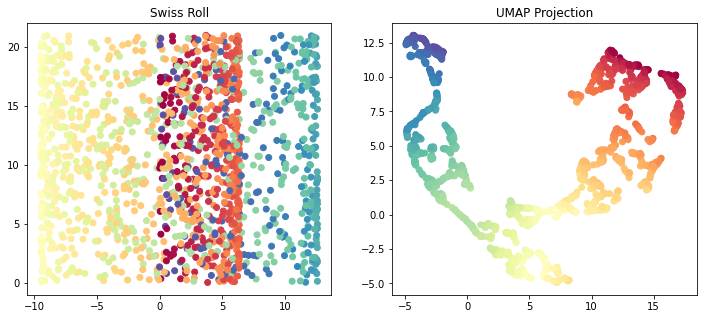

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from umap.umap_ import UMAP

# Generate Swiss Roll dataset
X, color = make_swiss_roll(n_samples=1500)

# Use UMAP for dimensionality reduction
umap = UMAP(n_neighbors=10, n_components=2)
X_umap = umap.fit_transform(X)

# Visualize the Swiss Roll and UMAP projection
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(X[:, 0], X[:, 1], c=color, cmap=plt.cm.Spectral)
ax1.set_title('Swiss Roll')

ax2.scatter(X_umap[:, 0], X_umap[:, 1], c=color, cmap=plt.cm.Spectral)
ax2.set_title('UMAP Projection')

plt.show()


| notation| speaks like| 
|---|---|
$a^n$ | a to (the power of) n
$a^2$ | a squared
$\frac{a}{b}$ | a over b
$\frac{1}{2} - \frac{1}{3}$ | one half minus one third
$(x,y)$ | x comma y
$x_n$ | x (sub) n
$B(R)$ | B (in terms) of R
$B^n(R)$ | B (in terms) of R to (the power of) n
$0 \leq x \leq 1$ | 0 less than or equal to x less than or equal to 1
$ x \in (0,1)$ | x in the open interval 0 to 1
$ x \in [0,1]$ | x in the closed interval 0 to 1
$ n \rightarrow \infty$ | n tends to infinity
$ a + b - c * d / e$ | a plus b minus c times d over e
$ \lim\limits_{n \rightarrow \infty} \frac{\ln N}{\ln(1/\epsilon)} = a$ | the limit of ln N over ln(1 over epsilon) as n tends to infinity is a
$a'$ | a prime

## Intuition

why

1. what causes sensitive dependence on initial conditions?
2. how a differential equation can generate a fractal attractor?

geometric

Lorenz (1963)  Smale (1967)
Hénon and Rössler (1976)

stretching and folding

1. techniques of attractor reconstruction
2. Poincaré section

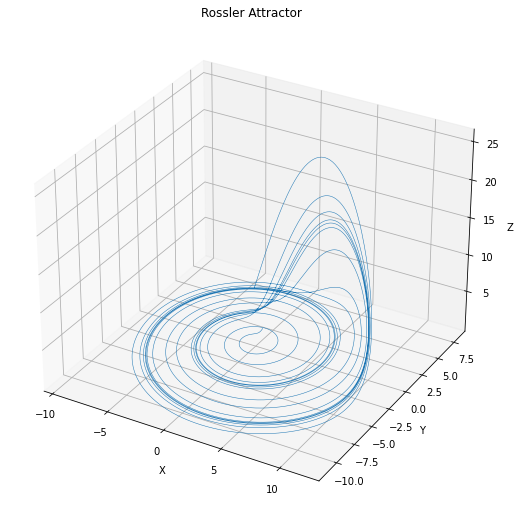

Text(0.5, 0.92, 'Lorenz Attractor')

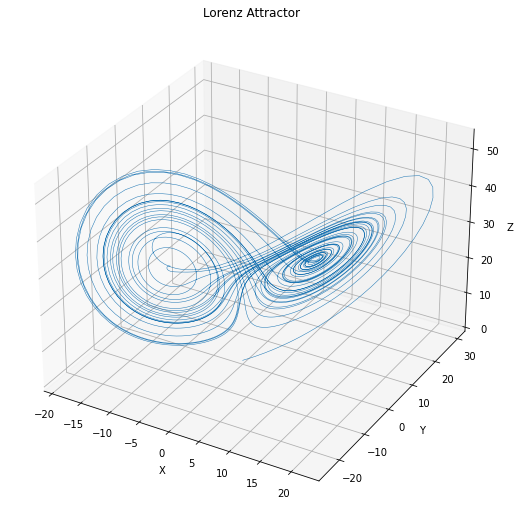

In [14]:
# a code to generate lorenz attractor and rosslerr attractor
# Path: chapter12.ipynb
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the Lorenz attractor
def lorenz(x, y, z, s=10, r=28, b=2.667):
    x_dot = s * (y - x)
    y_dot = r * x - y - x * z
    z_dot = x * y - b * z

    return x_dot, y_dot, z_dot

# Define the Rossler attractor
def rossler(x, y, z, a=0.2, b=0.2, c=5.7):
    x_dot = -y - z
    y_dot = x + a * y
    z_dot = b + z * (x - c)

    return x_dot, y_dot, z_dot

# Define the time step
dt = 0.01

# Define the number of iterations
n_iter = 10000

# Initialize the array for storing the values
xs = np.empty(n_iter + 1);ys = np.empty(n_iter + 1);zs = np.empty(n_iter + 1)

# Set initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Iterate the system
for i in range(n_iter):
    # Derivatives of the X, Y, Z state
    x_dot, y_dot, z_dot = rossler(xs[i], ys[i], zs[i])

    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

# Plot the Lorenz attractor in 3D
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Rossler Attractor')

plt.show()

# compute and plot the lorenz attractor
xs1 = np.empty(n_iter + 1);ys1 = np.empty(n_iter + 1);zs1 = np.empty(n_iter + 1)
for i in range(n_iter):
    # Derivatives of the X, Y, Z state
    x_dot, y_dot, z_dot = lorenz(xs1[i], ys1[i], zs1[i])    
    xs1[i + 1] = xs1[i] + (x_dot * dt)
    ys1[i + 1] = ys1[i] + (y_dot * dt)
    zs1[i + 1] = zs1[i] + (z_dot * dt)

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs1, ys1, zs1, lw=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz Attractor')

reconcile 

$e^{\lambda t}$

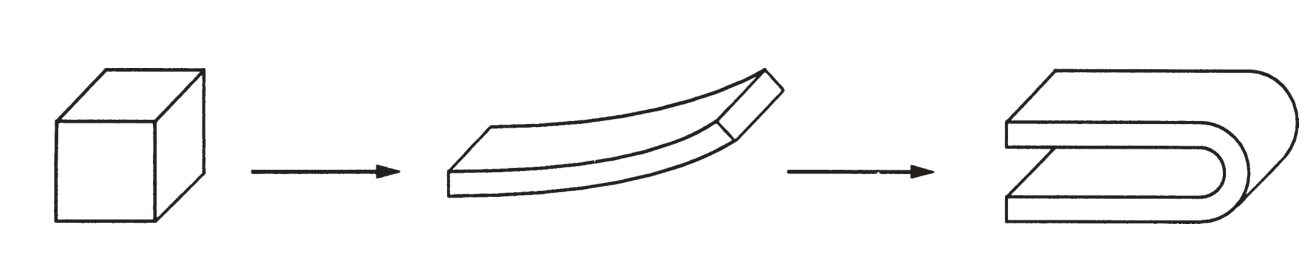

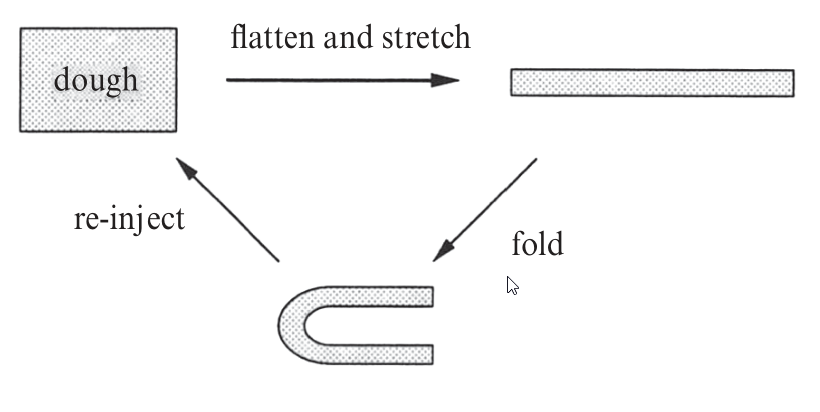


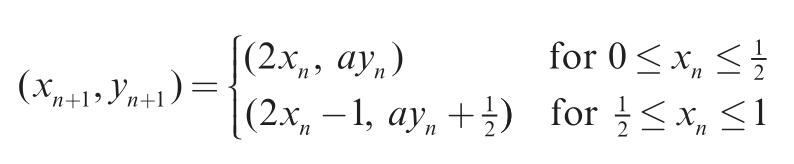

Pastry: 面包师
dough: 面团
filo: 薄饼
croissant: 牛角面包
elongate: 延长
viscosity: 粘度

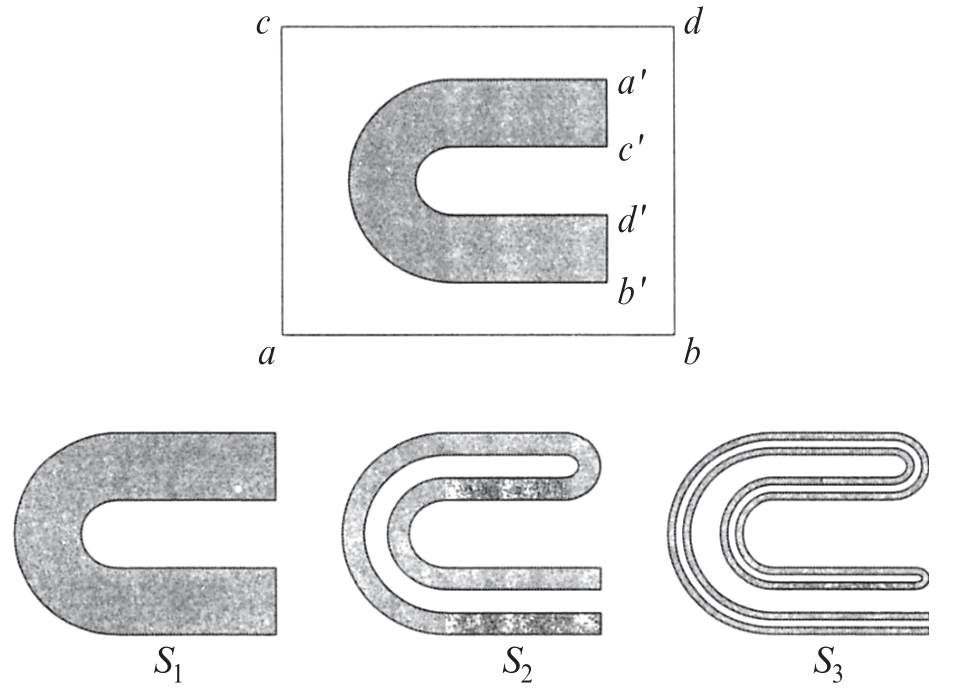

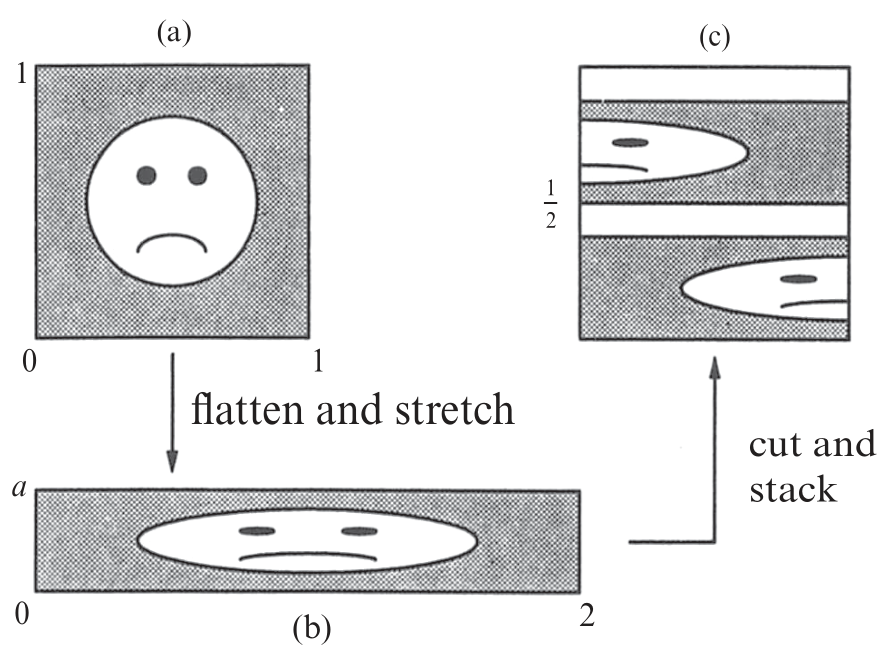

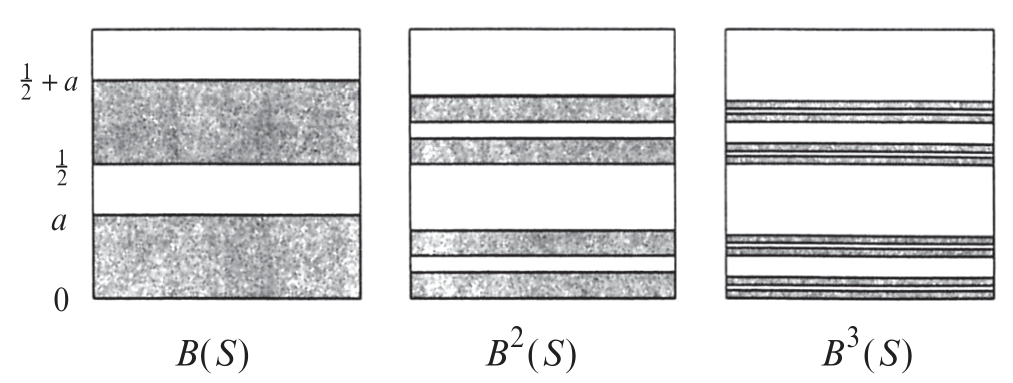

$A$

$B^n(x_0,y_0)$

$B^{n+1}(S) \subset B^n(S)$

$a^n \rightarrow 0$ as $n \rightarrow \infty$

$B^n(S)$

$N \approx a ^{-n} \times 2^n = (a/2)^{-n}$

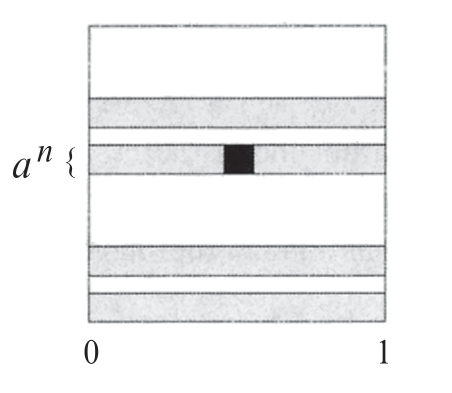

# Hénon Map

$x_{n+1} = y_n + 1 - a x_n^2$

$y_{n+1} = b x_n$

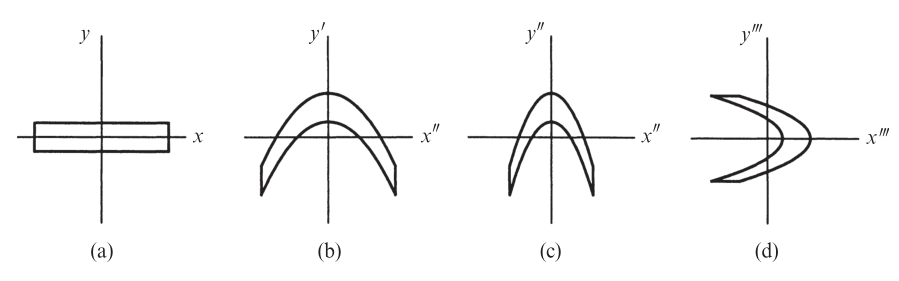

$T': x'=x, y'=1 + y - ax^2$

$T'': x''=bx', y''=y'$

$T''': x'''=y'', y'''=x''$

$T=T'''T''T'$


Invertible

dissipative

for certain parameter values, has a trapping region 

some trajectories escape to infinity

Show that the Hénon map {T} is invertible if $b \ne 0$, and find the inverse $T ^{-1}$.

Show that the Hénon map contracts areas if $-1 \le b \le 1$.


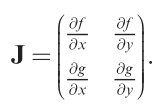
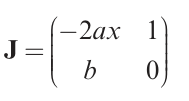

$(x,y) \rightarrow |J|dxdy$

Text(0.5, 1.0, 'Henon Map')

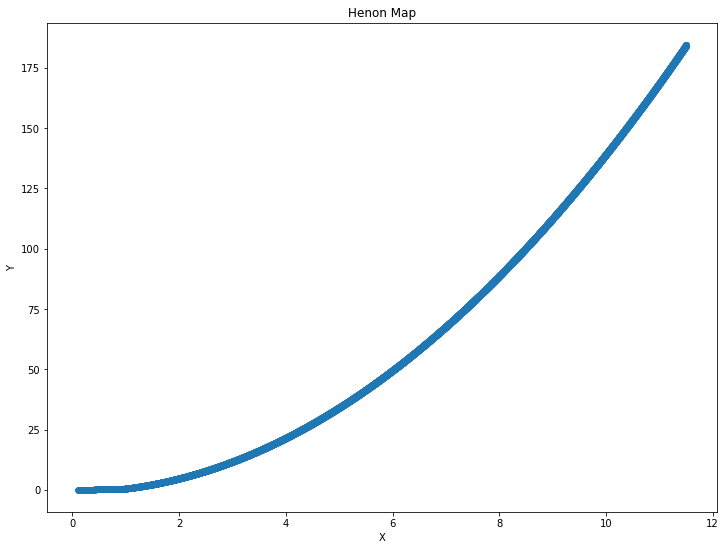

In [21]:
# give me a code testing henon map
# Path: chapter12.ipynb
import numpy as np
import matplotlib.pyplot as plt

# Define the Henon map
def henon(x, y, a=1.4, b=0.3):
    x_dot = 1 - a * x ** 2 + y
    y_dot = b * x

    return x_dot, y_dot

# Define the time step
dt = 0.01

# Define the number of iterations
n_iter = 10000

# Initialize the array for storing the values
xs = np.empty(n_iter + 1);ys = np.empty(n_iter + 1)

# Set initial values
xs[0], ys[0] = (0.1, 0.1)

# Iterate the system
for i in range(n_iter):
    # Derivatives of the X, Y, Z state
    x_dot, y_dot = henon(xs[i], ys[i])

    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)

# Plot the Henon map
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111)
ax.scatter(xs, ys, lw=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Henon Map')



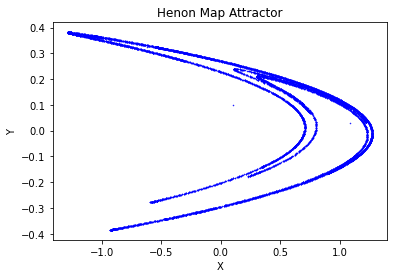

In [36]:
import matplotlib.pyplot as plt
from ipywidgets import interact

def henon_map(x, y, a=1.4, b=0.3):
    new_x = 1 - a * x**2 + y
    new_y = b * x
    return new_x, new_y

def generate_henon_attractor(x0, y0, num_points):
    points_x = [x0]
    points_y = [y0]

    for _ in range(num_points - 1):
        x, y = henon_map(points_x[-1], points_y[-1])
        points_x.append(x)
        points_y.append(y)

    return points_x, points_y

def plot_henon_attractor(points_x, points_y):    
    plt.scatter(points_x, points_y, s=1, color='blue', marker='.')
    plt.title('Henon Map Attractor')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

if __name__ == "__main__":
    # Initial conditions
    initial_x = 0.1
    initial_y = 0.1

    # Number of points to generate
    num_points = 10000

    # Generate Henon attractor points
    attractor_x, attractor_y = generate_henon_attractor(initial_x, initial_y, num_points)

    # Plot the Henon attractor
    plot_henon_attractor(attractor_x, attractor_y)





In [44]:
def plot_henon_attractor(points_x, points_y, ax,s):    
    ax.scatter(points_x, points_y, s=s, color='blue', marker='.')
    ax.set_title('Henon Map Attractor')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
def plots(t):
    fig, ax = plt.subplots(1, 1, figsize=(12, 9))
    plot_henon_attractor(attractor_x[:t], attractor_y[:t],ax,1)
    ax.scatter(attractor_x[t], attractor_y[t], s=100, color='red', marker='x')
    
    
    
interact(lambda t : plots(t), t=(0, len(attractor_x)-1, 1))


interactive(children=(IntSlider(value=4999, description='t', max=9999), Output()), _dom_classes=('widget-inter…

<function __main__.<lambda>(t)>

eerie: 怪异的
boomerang: 回力标


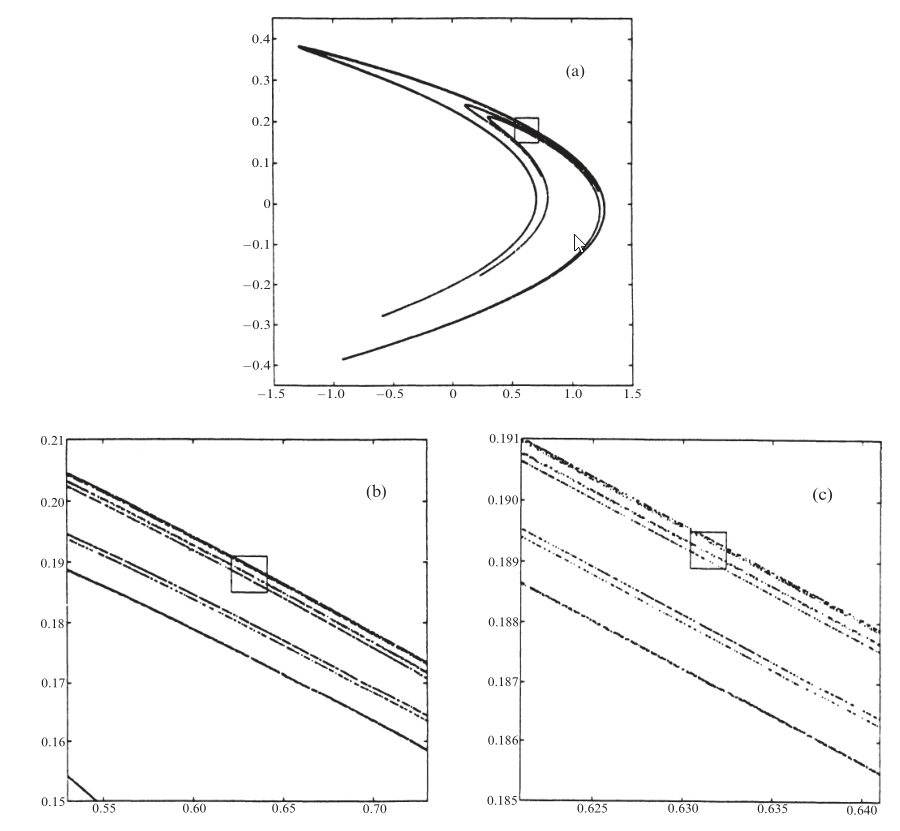

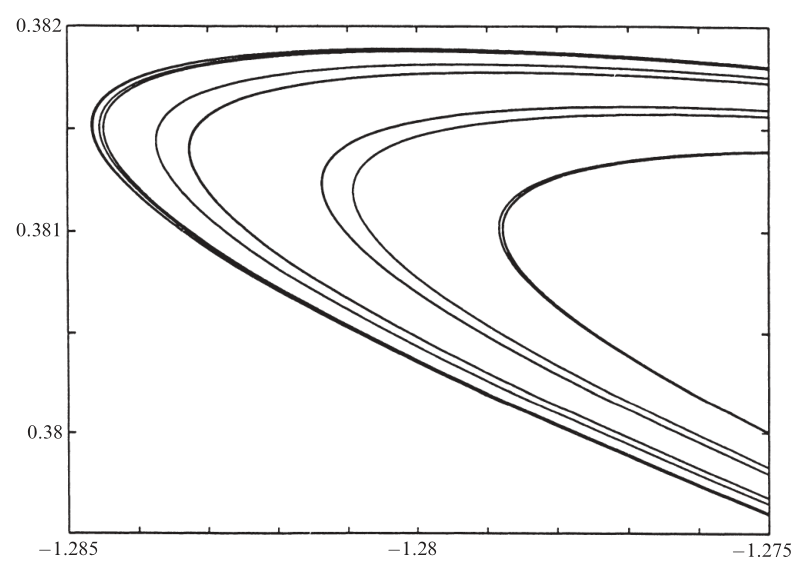

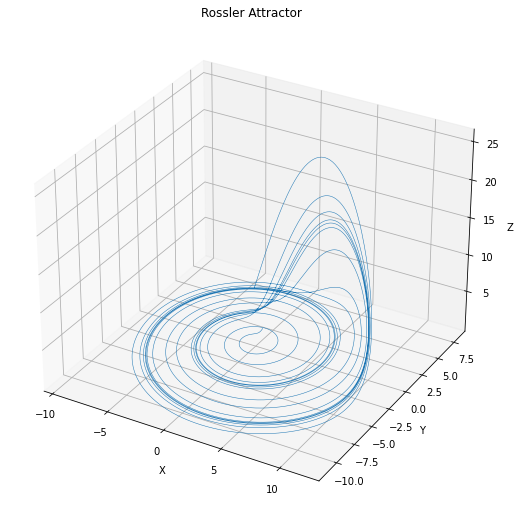

In [46]:
# a code to generate lorenz attractor and rosslerr attractor
# Path: chapter12.ipynb
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the Lorenz attractor
def lorenz(x, y, z, s=10, r=28, b=2.667):
    x_dot = s * (y - x)
    y_dot = r * x - y - x * z
    z_dot = x * y - b * z

    return x_dot, y_dot, z_dot

# Define the Rossler attractor
def rossler(x, y, z, a=0.2, b=0.2, c=5.7):
    x_dot = -y - z
    y_dot = x + a * y
    z_dot = b + z * (x - c)

    return x_dot, y_dot, z_dot

# Define the time step
dt = 0.01

# Define the number of iterations
n_iter = 10000

# Initialize the array for storing the values
xs = np.empty(n_iter + 1);ys = np.empty(n_iter + 1);zs = np.empty(n_iter + 1)

# Set initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Iterate the system
for i in range(n_iter):
    # Derivatives of the X, Y, Z state
    x_dot, y_dot, z_dot = rossler(xs[i], ys[i], zs[i])

    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

# Plot the Lorenz attractor in 3D
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Rossler Attractor')

plt.show()

# # compute and plot the lorenz attractor
# xs1 = np.empty(n_iter + 1);ys1 = np.empty(n_iter + 1);zs1 = np.empty(n_iter + 1)
# for i in range(n_iter):
#     # Derivatives of the X, Y, Z state
#     x_dot, y_dot, z_dot = lorenz(xs1[i], ys1[i], zs1[i])    
#     xs1[i + 1] = xs1[i] + (x_dot * dt)
#     ys1[i + 1] = ys1[i] + (y_dot * dt)
#     zs1[i + 1] = zs1[i] + (z_dot * dt)

# fig = plt.figure(figsize=(12, 9))
# ax = fig.add_subplot(111, projection='3d')
# ax.plot(xs1, ys1, zs1, lw=0.5)
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# ax.set_title('Lorenz Attractor')

pastry: 面包点心

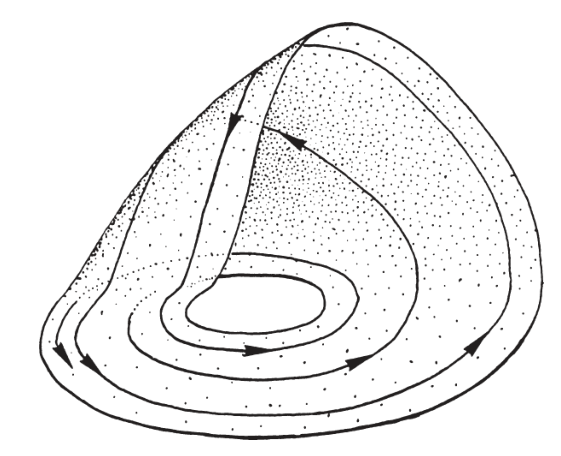

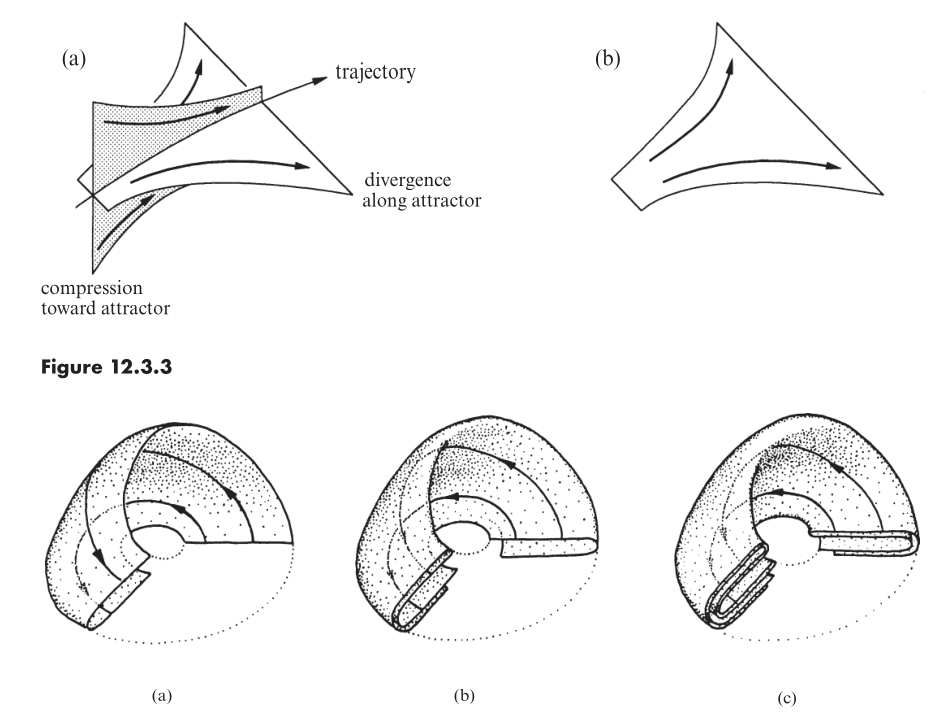

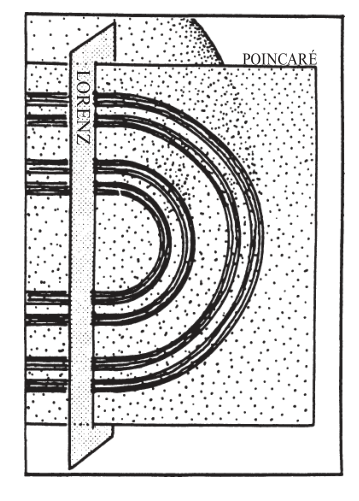

CT: computed tomography

# 12.4 Chemical chaos

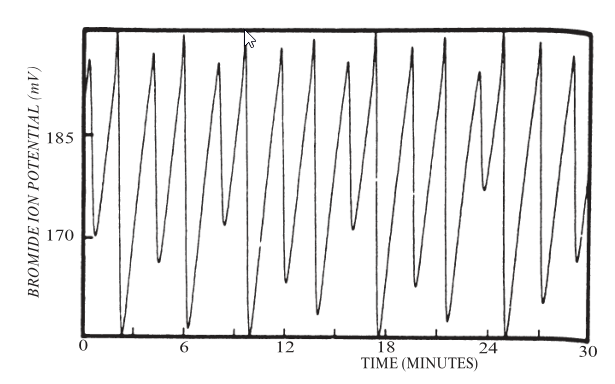

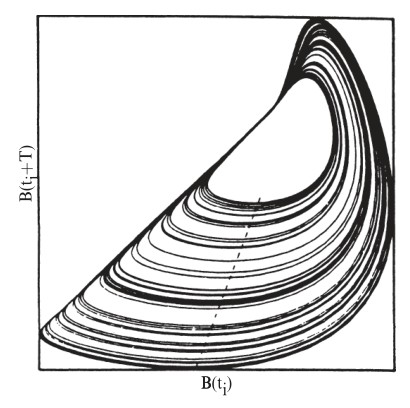

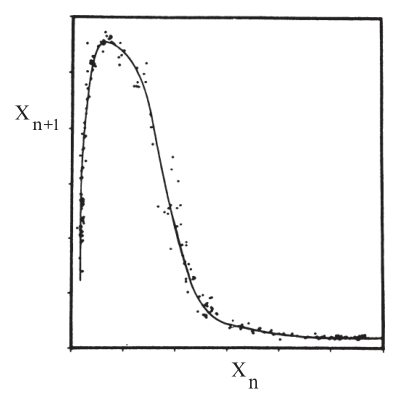

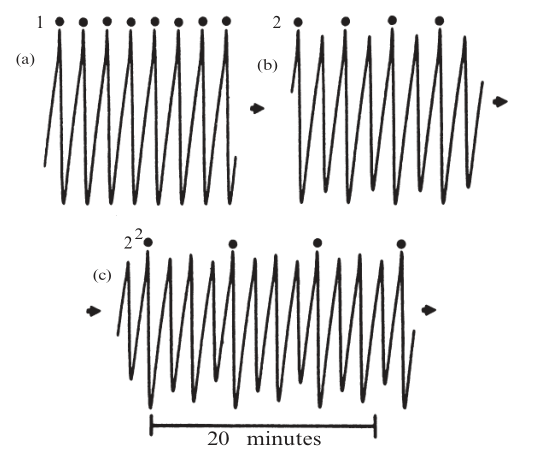

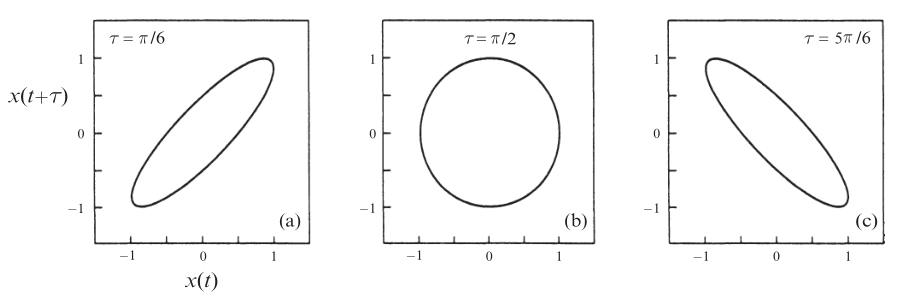

# 12.5.1

autonomous:

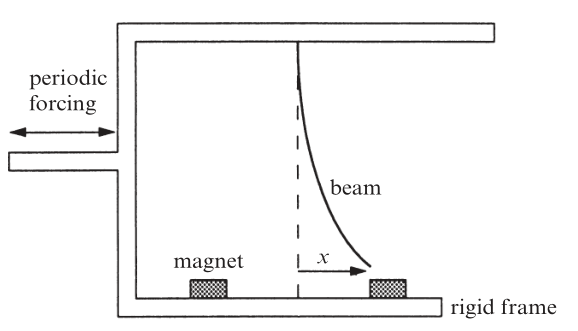

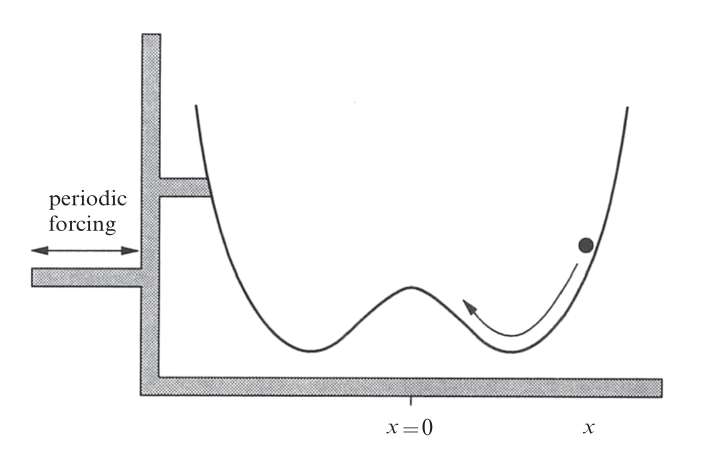

$\ddot x + \delta \dot x -x + x^3 = F \cos\omega t$

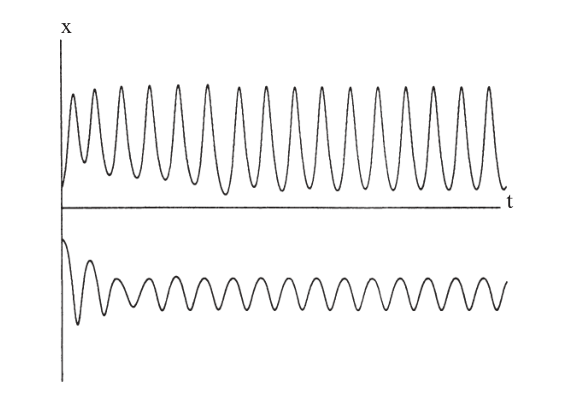

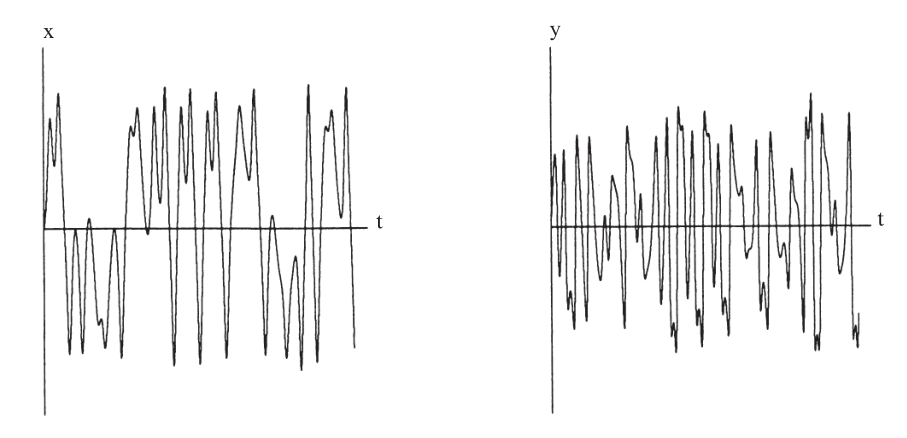

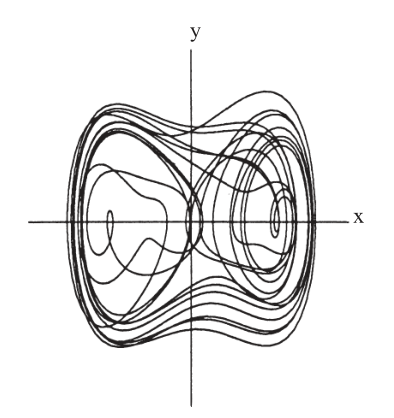

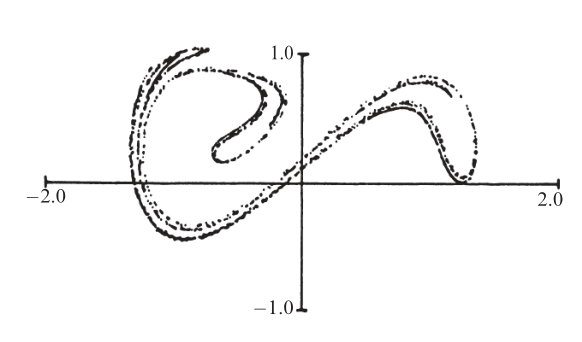

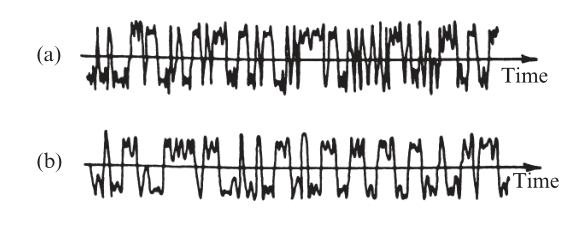

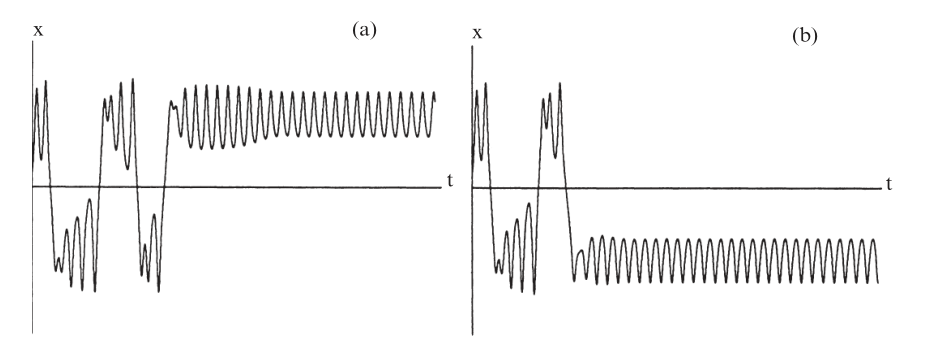

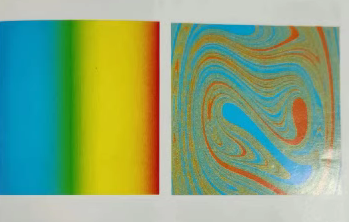